In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
columns = ['id', 'cycles', 'op_set1', 'op_set2', 'op_set3', 'sensor_1', 'sensor_2',
            'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
            'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16',
            'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23']

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/Dataset/PM_train.txt', sep = ' ', header=None,names=columns)
train_df.describe()

,id,cycles,op_set1,op_set2,op_set3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [6]:
test_df = pd.read_csv('/content/drive/MyDrive/Dataset/PM_test.txt', sep = ' ', header=None,names=columns)
test_df.describe()


,id,cycles,op_set1,op_set2,op_set3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,13096.00,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000,0.0,0.0
mean,51.543907,76.836515,-0.000011,0.000004,100.0,518.67,642.475088,1588.099204,1404.735362,1.462000e+01,...,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743,NaN,NaN
std,28.289423,53.057749,0.002203,0.000294,0.0,0.00,0.400899,5.003274,6.688309,1.776425e-15,...,10.188605,0.029009,1.040874e-17,1.233577,0.0,0.0,0.141681,0.084120,NaN,NaN
min,1.000000,1.000000,-0.008200,-0.000600,100.0,518.67,641.130000,1569.040000,1384.390000,1.462000e+01,...,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400,NaN,NaN
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,518.67,642.197500,1584.600000,1399.950000,1.462000e+01,...,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600,NaN,NaN
50%,52.000000,69.000000,0.000000,0.000000,100.0,518.67,642.460000,1587.990000,1404.440000,1.462000e+01,...,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200,NaN,NaN
75%,76.000000,113.000000,0.001500,0.000300,100.0,518.67,642.740000,1591.362500,1409.050000,1.462000e+01,...,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600,NaN,NaN
max,100.000000,303.000000,0.007800,0.000700,100.0,518.67,644.300000,1607.550000,1433.360000,1.462000e+01,...,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900,NaN,NaN


In [7]:
train_df.isnull().sum()

id               0
cycles           0
op_set1          0
op_set2          0
op_set3          0
sensor_1         0
sensor_2         0
sensor_3         0
sensor_4         0
sensor_5         0
sensor_6         0
sensor_7         0
sensor_8         0
sensor_9         0
sensor_10        0
sensor_11        0
sensor_12        0
sensor_13        0
sensor_14        0
sensor_15        0
sensor_16        0
sensor_17        0
sensor_18        0
sensor_19        0
sensor_20        0
sensor_21        0
sensor_22    20631
sensor_23    20631
dtype: int64

In [8]:
train_df.drop(['sensor_22','sensor_23','sensor_1','sensor_10','sensor_18','sensor_19','op_set3','sensor_5','sensor_16'],axis=1,inplace=True)
test_df.drop(['sensor_22','sensor_23','sensor_1','sensor_10','sensor_18','sensor_19','op_set3','sensor_5','sensor_16'],axis=1,inplace=True)

In [9]:
max_RUL_train = train_df.groupby('id')['cycles'].max().reset_index().rename(columns = {'cycles': 'max_cycles'})
max_RUL_test =  test_df.groupby('id')['cycles'].max().reset_index().rename(columns = {'cycles': 'max_cycles'})

In [10]:
train_df = train_df.merge(max_RUL_train, on='id', how = 'left')
test_df = test_df.merge(max_RUL_train, on='id', how = 'left')
train_df.head()

,id,cycles,op_set1,op_set2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,max_cycles
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192


In [11]:
train_df['RUL'] = train_df['max_cycles'] - train_df['cycles']
test_df['RUL'] = test_df['max_cycles'] - test_df['cycles']

In [12]:
train_df.drop(['max_cycles'],axis = 1,inplace = True)
test_df.drop(['max_cycles'],axis = 1,inplace = True)

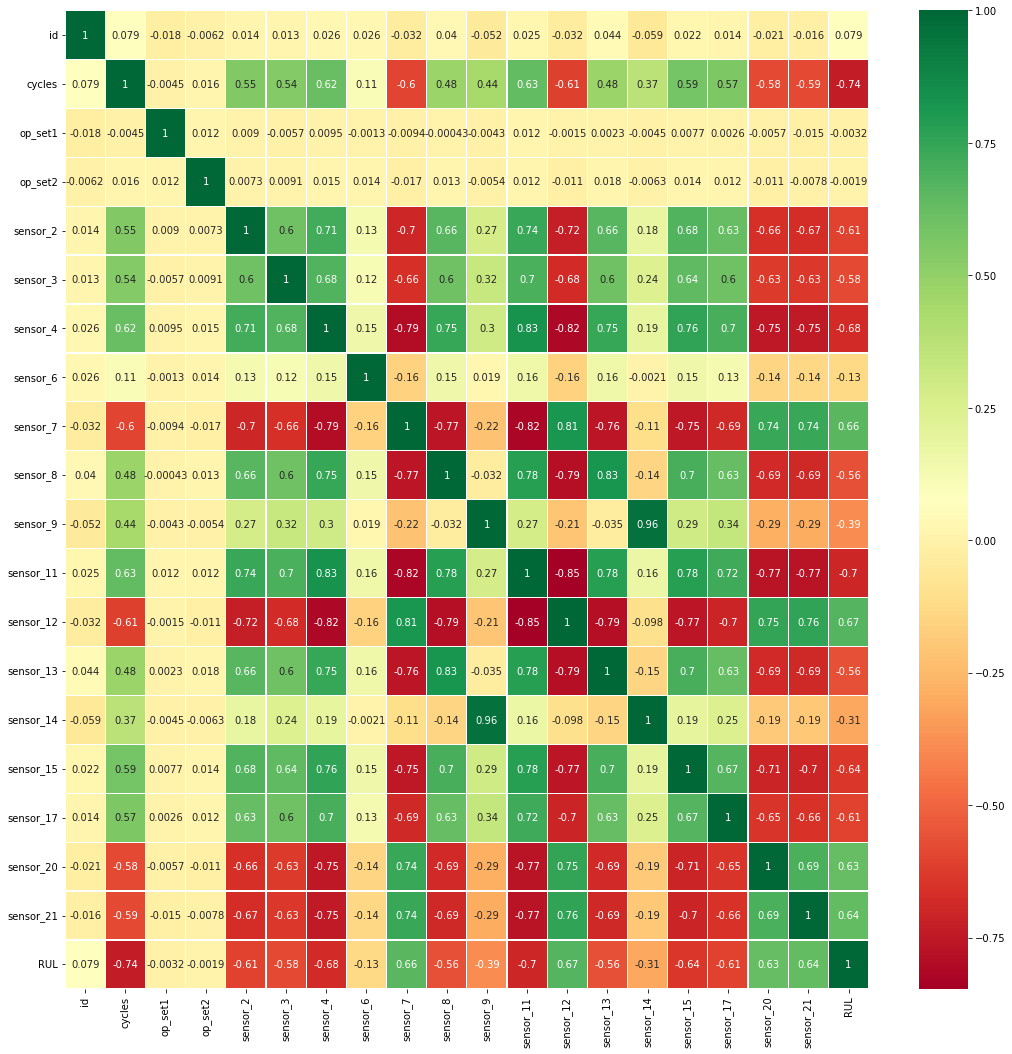

In [13]:
sb.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(18,18)
plt.show()

In [14]:
train_df.drop(['cycles','op_set1','op_set2','sensor_6','sensor_14','sensor_9'],axis = 1,inplace = True)
test_df.drop(['cycles','op_set1','op_set2','sensor_6','sensor_14','sensor_9','RUL'],axis = 1,inplace = True)

In [15]:
def score(y_true,y_pred,a1=10,a2=13):
    score = 0
    d = y_pred - y_true
    for i in d:
        if i >= 0 :
            score += math.exp(i/a2) - 1   
        else:
            score += math.exp(- i/a1) - 1
    return score

def score_func(y_true,y_pred):
    lst = [round(score(y_true,y_pred),2), 
          round(mean_absolute_error(y_true,y_pred),2),
          round(mean_squared_error(y_true,y_pred),2)**0.5,
          round(r2_score(y_true,y_pred),2)]
    
    print(f' compatitive score {lst[0]}')
    print(f' mean absolute error {lst[1]}')
    print(f' root mean squared error {lst[2]}')
    print(f' R2 score {lst[3]}')
    return [lst[1], round(lst[2],2), lst[3]*100]

In [16]:
test_df.head()

,id,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21
0,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735
1,1,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916
2,1,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166
3,1,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737
4,1,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130


In [17]:
min_max_scaler = MinMaxScaler()

In [18]:
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(
    train_df[train_df.columns.difference(['id', 'RUL'])]
), columns = train_df.columns.difference(['id', 'RUL']))

norm_test_df = pd.DataFrame(min_max_scaler.transform(
    test_df[test_df.columns.difference(['id'])]
), columns = test_df.columns.difference(['id']))

norm_train_df

,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_2,sensor_20,sensor_21,sensor_3,sensor_4,sensor_7,sensor_8
0,0.369048,0.633262,0.205882,0.363986,0.333333,0.183735,0.713178,0.724662,0.406802,0.309757,0.726248,0.242424
1,0.380952,0.765458,0.279412,0.411312,0.333333,0.283133,0.666667,0.731014,0.453019,0.352633,0.628019,0.212121
2,0.250000,0.795309,0.220588,0.357445,0.166667,0.343373,0.627907,0.621375,0.369523,0.370527,0.710145,0.272727
3,0.166667,0.889126,0.294118,0.166603,0.333333,0.343373,0.573643,0.662386,0.256159,0.331195,0.740741,0.318182
4,0.255952,0.746269,0.235294,0.402078,0.416667,0.349398,0.589147,0.704502,0.257467,0.404625,0.668277,0.242424
...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.726190,0.170576,0.558824,0.656791,0.750000,0.686747,0.271318,0.109500,0.587312,0.782917,0.254428,0.439394
20627,0.708333,0.211087,0.500000,0.727203,0.583333,0.701807,0.124031,0.366197,0.729453,0.866475,0.162641,0.500000
20628,0.738095,0.281450,0.529412,0.922278,0.833333,0.665663,0.232558,0.053991,0.684979,0.775321,0.175523,0.515152
20629,0.916667,0.208955,0.514706,0.823394,0.583333,0.608434,0.116279,0.234466,0.746021,0.747468,0.133655,0.530303


In [19]:
join_train_df = train_df[['id', 'RUL']].join(norm_train_df)
join_test_df = test_df[['id']].join(norm_test_df)
join_train_df

,id,RUL,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_2,sensor_20,sensor_21,sensor_3,sensor_4,sensor_7,sensor_8
0,1,191,0.369048,0.633262,0.205882,0.363986,0.333333,0.183735,0.713178,0.724662,0.406802,0.309757,0.726248,0.242424
1,1,190,0.380952,0.765458,0.279412,0.411312,0.333333,0.283133,0.666667,0.731014,0.453019,0.352633,0.628019,0.212121
2,1,189,0.250000,0.795309,0.220588,0.357445,0.166667,0.343373,0.627907,0.621375,0.369523,0.370527,0.710145,0.272727
3,1,188,0.166667,0.889126,0.294118,0.166603,0.333333,0.343373,0.573643,0.662386,0.256159,0.331195,0.740741,0.318182
4,1,187,0.255952,0.746269,0.235294,0.402078,0.416667,0.349398,0.589147,0.704502,0.257467,0.404625,0.668277,0.242424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,4,0.726190,0.170576,0.558824,0.656791,0.750000,0.686747,0.271318,0.109500,0.587312,0.782917,0.254428,0.439394
20627,100,3,0.708333,0.211087,0.500000,0.727203,0.583333,0.701807,0.124031,0.366197,0.729453,0.866475,0.162641,0.500000
20628,100,2,0.738095,0.281450,0.529412,0.922278,0.833333,0.665663,0.232558,0.053991,0.684979,0.775321,0.175523,0.515152
20629,100,1,0.916667,0.208955,0.514706,0.823394,0.583333,0.608434,0.116279,0.234466,0.746021,0.747468,0.133655,0.530303


In [20]:
join_test_df = join_test_df.reset_index(drop = True)

In [21]:
unique, counts = np.unique(join_test_df['id'], return_counts=True)
unique_count = np.asarray((unique, counts)).T
del_col = []
for i in unique_count:
  if i[1] <= 50:
    del_col.append(i[0])

del_col

[1, 2, 14, 22, 25, 33, 39, 85]

In [22]:
def gen_sequence(id_df, seq_length, seq_cols):
        data_matrix = id_df[seq_cols].values
        num_elements = data_matrix.shape[0]
        for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
            yield data_matrix[start:stop, :]

In [23]:
sequence_length = 50
sequence_cols = train_df.columns.difference(['id', 'RUL'])
sequence_cols

Index(['sensor_11', 'sensor_12', 'sensor_13', 'sensor_15', 'sensor_17',
       'sensor_2', 'sensor_20', 'sensor_21', 'sensor_3', 'sensor_4',
       'sensor_7', 'sensor_8'],
      dtype='object')

In [24]:
val=list(gen_sequence(join_train_df[join_train_df['id']==1], sequence_length, sequence_cols))
print(len(val))

142


In [25]:
seq_gen = (list(gen_sequence(join_train_df[join_train_df['id']==id], 
                             sequence_length, sequence_cols)
               ) 
           for id in join_train_df['id'].unique()
          )

In [26]:
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
print(seq_array.shape)
train_seq = seq_array

(15631, 50, 12)


In [27]:
def gen_labels(id_df, seq_length, label):
        data_matrix = id_df[label].values
        num_elements = data_matrix.shape[0]
        return data_matrix[seq_length:num_elements, :]

In [28]:
label_gen = [gen_labels(join_train_df[join_train_df['id']==id], 
                        sequence_length, 
                        ['RUL']) 
             for id in join_train_df['id'].unique()]

label_array = np.concatenate(label_gen).astype(np.float32)
print(label_array.shape)
print(label_array)

(15631, 1)
[[141.]
 [140.]
 [139.]
 ...
 [  2.]
 [  1.]
 [  0.]]


In [29]:
def gen_sequence1(id_df, seq_length, seq_cols):
        data_matrix = id_df[seq_cols].values
        yield data_matrix[-seq_length:]

In [30]:
join_test_df

,id,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_2,sensor_20,sensor_21,sensor_3,sensor_4,sensor_7,sensor_8
0,1,0.208333,0.646055,0.220588,0.308965,0.333333,0.545181,0.558140,0.661834,0.310661,0.269413,0.652174,0.212121
1,1,0.386905,0.739872,0.264706,0.213159,0.416667,0.150602,0.682171,0.686827,0.379551,0.222316,0.805153,0.166667
2,1,0.386905,0.699360,0.220588,0.458638,0.416667,0.376506,0.728682,0.721348,0.346632,0.322248,0.685990,0.227273
3,1,0.255952,0.573561,0.250000,0.257022,0.250000,0.370482,0.666667,0.662110,0.285154,0.408001,0.679549,0.196970
4,1,0.273810,0.737740,0.220588,0.300885,0.166667,0.391566,0.658915,0.716377,0.352082,0.332039,0.694042,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,0.500000,0.426439,0.176471,0.564063,0.500000,0.611446,0.395349,0.418669,0.619359,0.566172,0.573269,0.181818
13092,100,0.446429,0.503198,0.308824,0.485956,0.583333,0.605422,0.333333,0.528721,0.537388,0.671843,0.542673,0.227273
13093,100,0.428571,0.530917,0.235294,0.507888,0.583333,0.671687,0.372093,0.429301,0.482014,0.414754,0.513688,0.318182
13094,100,0.452381,0.562900,0.294118,0.562524,0.583333,0.617470,0.403101,0.518779,0.522128,0.626435,0.566828,0.257576


In [31]:
ids = join_test_df['id'].unique().tolist()
for i in del_col:
  ids.remove(i)
seq_gen1 = (list(gen_sequence1(join_test_df[join_test_df['id']==id], 
                             sequence_length, sequence_cols)
               ) 
           for id in ids
          )

In [32]:
test_seq = np.concatenate(list(seq_gen1)).astype(np.float32)
print(test_seq.shape)

(92, 50, 12)


In [33]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense , LSTM, Dropout
from keras.layers.core import Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random
import tensorflow as tf
import os

In [34]:
def seed_tensorflow(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed) 
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1' 
    PYTHONHASHSEED=0
seed_tensorflow(42)

In [35]:
def r2_keras(y_true, y_pred):
    """Coefficient of Determination 
    """
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [39]:
def lstm_train(seq_array, label_array, sequence_length):
    # The first layer is an LSTM layer with 80 units followed by another LSTM layer with 40 units. 
    # Dropout is also applied after each LSTM layer to control overfitting. 
    # Final layer is a Dense output layer with single unit and linear activation since this is a regression problem.
    nb_features = seq_array.shape[2]
    nb_out = label_array.shape[1]

    model = Sequential()
    model.add(LSTM(
             input_shape=(sequence_length, nb_features),
             units=80,
             return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(
              units=40,
              return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=nb_out))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae',r2_keras])
    #
    print(model.summary())
    
    
    # fit the network # Commoly used 80 epoches but 50-60 are fine its an early cutoff 
    history = model.fit(seq_array, label_array, 
                        epochs=10, batch_size=200, 
                        validation_split=0.05, verbose=2,
                        callbacks = [ModelCheckpoint('best_model_val_r2_keras_' + '{val_r2_keras:.4f}' + '.h5', 
                                                    monitor='val_r2_keras', 
                                                    save_best_only = True, 
                                                    mode = 'max', 
                                                    verbose=0)])
    
    # list all data in history
    #print(history.history.keys())
    
    return model, history

In [40]:
sequence_length = 50
sequence_cols = ['sensor_11', 'sensor_12', 'sensor_13', 'sensor_15', 'sensor_17',
       'sensor_2', 'sensor_20', 'sensor_21', 'sensor_3', 'sensor_4',
       'sensor_7', 'sensor_8']

In [41]:
model, history = lstm_train(train_seq, label_array, sequence_length)
model.save('/content/drive/MyDrive/colab data source/aircraft engine failure prediction/LSTM_model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 80)            29760     
                                                                 
 dropout_2 (Dropout)         (None, 50, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 40)                19360     
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 49,161
Trainable params: 49,161
Non-trai

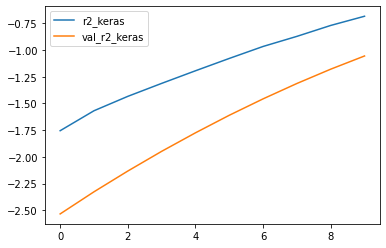

In [42]:
hist_df = pd.DataFrame(data = np.array([history.history['r2_keras'],history.history['val_r2_keras']]).T, 
                       columns = ['r2_keras', 'val_r2_keras'])
hist_df.plot()

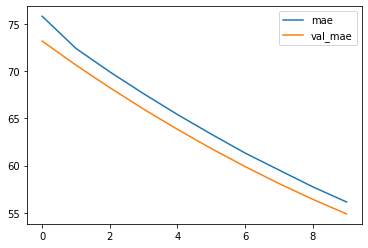

In [43]:
hist_df = pd.DataFrame(data = np.array([history.history['mae'],history.history['val_mae']]).T, 
                       columns = ['mae', 'val_mae'])
hist_df.plot()

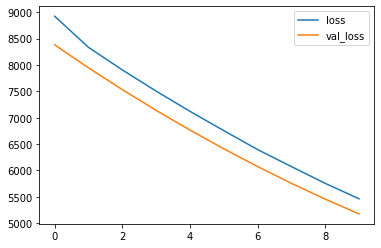

In [44]:
hist_df = pd.DataFrame(data = np.array([history.history['loss'],history.history['val_loss']]).T, 
                       columns = ['loss', 'val_loss'])
hist_df.plot()

In [45]:
test_seq = np.asarray(test_seq).astype(np.float32)
y_pred_test = model.predict(test_seq,verbose=1, batch_size=200)

1/1 [==============================] - 1s 897ms/step


In [46]:
len(y_pred_test)

92

In [47]:
truth_df = pd.read_csv('/content/drive/MyDrive/Dataset/PM_test.txt', sep = ' ', header=None)
truth_df['id'] = truth_df.index+1
truth_df = truth_df.merge(max_RUL_test, on = 'id', how = 'left')
truth_df = truth_df.loc[truth_df['max_cycles']>50]
truth_df.drop(labels = [1,'id', 'max_cycles'], 
                 axis = 1, 
                 inplace = True)
truth_df.reset_index(drop = True, inplace = True)
truth_df

,0,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
0,1,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
1,1,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
2,1,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
3,1,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,21.61,...,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,NaN,NaN
4,1,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,21.61,...,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,3,0.0021,-0.0000,100.0,518.67,642.38,1592.50,1400.05,14.62,21.61,...,8127.71,8.4246,0.03,393,2388,100.0,38.92,23.3800,NaN,NaN
88,3,0.0003,0.0000,100.0,518.67,642.83,1588.45,1405.40,14.62,21.61,...,8128.93,8.4287,0.03,392,2388,100.0,38.81,23.3644,NaN,NaN
89,3,0.0015,-0.0000,100.0,518.67,642.61,1581.11,1409.15,14.62,21.61,...,8135.06,8.3918,0.03,393,2388,100.0,38.87,23.1391,NaN,NaN
90,3,0.0030,-0.0002,100.0,518.67,642.92,1587.40,1410.35,14.62,21.61,...,8136.31,8.4564,0.03,393,2388,100.0,39.00,23.2953,NaN,NaN


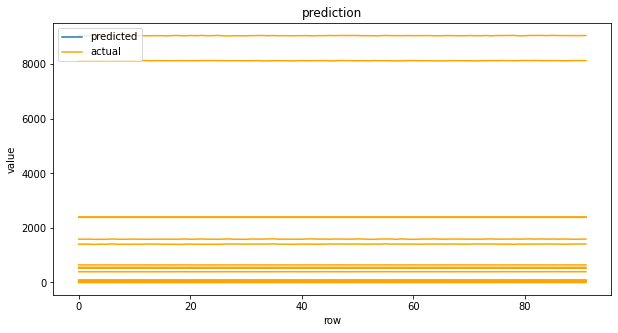

In [48]:
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test)
plt.plot(truth_df, color="orange")
plt.title('prediction')
plt.ylabel('value')
plt.xlabel('row')
plt.legend(['predicted', 'actual'], loc='upper left')
plt.show()

In [49]:
scores_test = model.evaluate(test_seq, truth_df, verbose=2)
print('\nMAE: {}'.format(scores_test[1]))
print('\nR^2: {}'.format(scores_test[2]))

3/3 - 3s - loss: nan - mae: nan - r2_keras: nan - 3s/epoch - 913ms/step

MAE: nan

R^2: nan
